In [1]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

import torch
import torch.nn as nn

from Data.Station_data import StationDataloader
from Models.STFPM import STFPM
from Utils.Visualizer import plot_distribution

In [2]:
args = OmegaConf.load('./Config/station_STFPM_config.yaml')
os.makedirs(args.experiment_path, exist_ok=True)
os.makedirs(args.checkpoint_save, exist_ok=True)
np.random.seed(0)
torch.manual_seed(0)
args

{'experiment_name': 'station', 'experiment_path': './Experiments/STFPM/station_258x192_200_norm', 'dataroot': './Datasets/station', 'resume': False, 'weight_path': './Experiments/STFPM/station/best.pth.tar', 'checkpoint_save': './Experiments/STFPM/station_258x192_200_norm/checkpoint', 'checkpoint_load': './Experiments/STFPM/station_258x192_200_norm/checkpoint/checkpoint_best.pt', 'log_path': './Experiments/STFPM/station_258x192_200_norm2/station.log', 'start_epoch': 1, 'finish_epoch': 200, 'manualseed': 42, 'batchSize': 64, 'imageSize_h': 258, 'imageSize_w': 192, 'lossSize_h': 86, 'lossSize_w': 64, 'device': 'gpu', 'gpu_ids': 0, 'ngpu': 1, 'lr': 0.4, 'momentum': 0.9, 'weight_decay': 0.0001, 'sample_interval': 20}

In [3]:
test_neg_loader, test_pos_loader = StationDataloader(args.dataroot, batchSize=args.batchSize, imageSize_h=args.imageSize_h, imageSize_w=args.imageSize_w, is_train=False)

In [4]:
Tester = STFPM(args)

/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


{'Epoch_loss': 0.8071978735923767, 'Val_loss': 0.02159877762659689}
Checpoint have been loaded.
Student'weight load fail.


In [5]:
Tester.start_epoch

101

In [6]:
Tester.cur_losses

{'Epoch_loss': 0.8071978735923767, 'Val_loss': 0.02159877762659689}

In [8]:
Tester.cal_auc(test_neg_loader, test_pos_loader)

0.8932203389830509

In [9]:
scores_neg, scores_pos = Tester.get_scores(test_neg_loader, test_pos_loader)

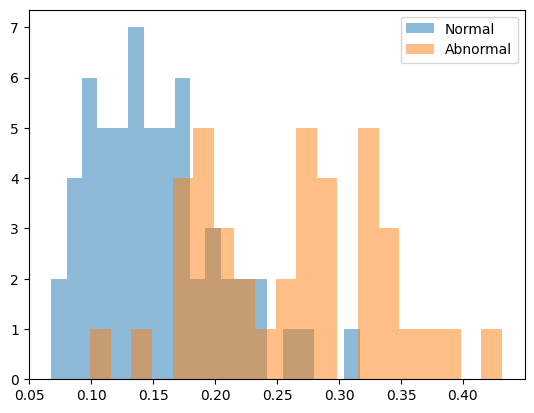

In [10]:
plot_distribution(scores_neg, scores_pos, 20)